Compute the Jacobian of Equations 15 and 16
==

In [1]:
from __future__ import division

In [3]:
import sympy
sympy.init_printing()
x_1, x_2 = sympy.symbols('x_1, x_2')
x_1

In [1]:
f1 = 20. + ([(x**2 - 10. * np.cos(2. * np.pi * x)) for x in X
f1

NameError: name 'X' is not defined

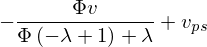

In [18]:
f2 = v_ps - (Phi * v)/(lambd + (1 - lambd) * Phi)
f2

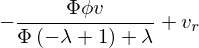

In [19]:
f3 = v_r - (phi * Phi * v)/(lambd + (1 - lambd) * Phi)
f3

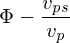

In [21]:
f4 = Phi - v_ps/v_p
f4

In [31]:
sympy.solve([f1, f2, f3, f4], [v_p, v_ps, v_r, Phi])

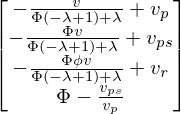

In [29]:
F = sympy.Matrix([f1,f2, f3, f4])
F

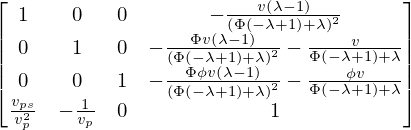

In [30]:
F.jacobian([v_p, v_ps, v_r, Phi])

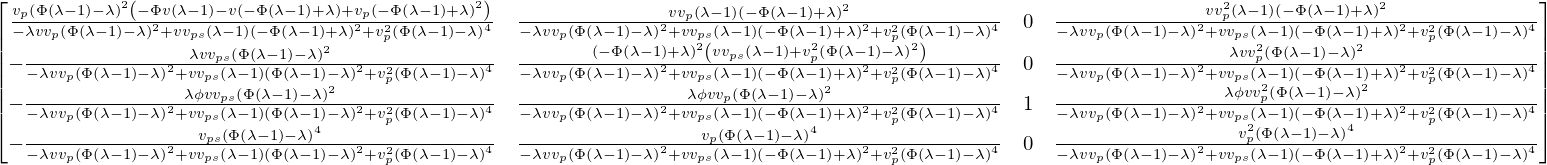

In [36]:
sympy.simplify(F.jacobian([v_p, v_ps, v_r, Phi]).inv())

In [37]:
sympy.init_printing(False)
F.jacobian([v_p, v_ps, v_r, Phi])

Matrix([
[          1,      0, 0,                                              -v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2],
[          0,      1, 0,         -Phi*v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2 - v/(Phi*(-lambda + 1) + lambda)],
[          0,      0, 1, -Phi*phi*v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2 - phi*v/(Phi*(-lambda + 1) + lambda)],
[v_ps/v_p**2, -1/v_p, 0,                                                                                            1]])

Attempt to find an explicit expression for pressure, given the internal energy
===

In [71]:
import sympy
sympy.init_printing()
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s = sympy.symbols('e, e_p^s, e_r^s, v_p, v_ps, v_r, Phi, phi, lambda, v, phi, Gamma_p, Gamma_r, p, p_p^s, p_r^s')
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s

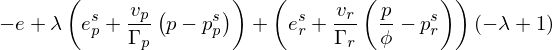

In [73]:
f1 = - e + ((1 - lambd) * (e_r_s + (v_r/gam_r) * (p/phi - p_r_s))   
            +    lambd  * (e_p_s + (v_p/gam_p) * (p - p_p_s))
            )  # = 0
f1

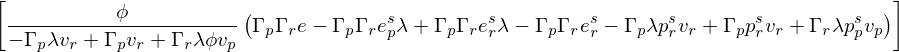

In [74]:
sympy.solve(f1, p)

In [75]:
sympy.init_printing(False)
sympy.solve(f1, p)

[phi*(Gamma_p*Gamma_r*e - Gamma_p*Gamma_r*e_p^s*lambda + Gamma_p*Gamma_r*e_r^s*lambda - Gamma_p*Gamma_r*e_r^s - Gamma_p*lambda*p_r^s*v_r + Gamma_p*p_r^s*v_r + Gamma_r*lambda*p_p^s*v_p)/(-Gamma_p*lambda*v_r + Gamma_p*v_r + Gamma_r*lambda*phi*v_p)]

Find the initial energy
===

In [76]:
import sympy
sympy.init_printing()
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s, INT = sympy.symbols('e, e_p^s, e_r^s, v_p, v_ps, v_r, Phi, phi, lambda, v, phi, Gamma_p, Gamma_r, p, p_p^s, p_r^s, INT')
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s, INT

In [83]:
f2 = - e + ((1 - lambd) * ((INT + e) + (v_r/gam_r) * (p/phi - p_r_s))   
            +    lambd  * (e_p_s + (v_p/gam_p) * (p - p_p_s))
            )  # = 0
f2

-e + lambda*(e_p^s + v_p*(p - p_p^s)/Gamma_p) + (-lambda + 1)*(INT + e + v_r*(p/phi - p_r^s)/Gamma_r)

Note that lambd_0 = 0:

In [81]:
f2 = - e + (((INT + e) + (v_r/gam_r) * (p/phi - p_r_s))  
            )  # = 0
f2

INT + v_r*(p/phi - p_r^s)/Gamma_r

In [84]:
sympy.init_printing(False)
sympy.solve(f2, e)

[-INT + INT/lambda + e_p^s - p*v_r/(Gamma_r*phi) + p_r^s*v_r/Gamma_r + p*v_r/(Gamma_r*lambda*phi) - p_r^s*v_r/(Gamma_r*lambda) + p*v_p/Gamma_p - p_p^s*v_p/Gamma_p]